<a href="https://colab.research.google.com/github/NafisaKhan/Coding-Challenges/blob/NafisaKhan-solution/nlp-specialist/challenge-2/Challenge_2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First install these libraries if not installed previously
!pip install pandas numpy seaborn matplotlib scikit-learn

In [ ]:
#Import necessary libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Load the CSV dataset file
data_path='https://raw.githubusercontent.com/NafisaKhan/Coding-Challenges/NafisaKhan-solution/nlp-specialist/challenge-2/bangla_product_reviews.csv'
review_df=pd.read_csv(data_path)

#Print the first and last 5 rows from the dataset
print('First and last five reviews from dataset:')
print(review_df.head())
print(review_df.tail())

First and last five reviews from dataset:
                               Review  Rating
0              এই পণ্যটি সত্যিই ভালো!       2
1              এই পণ্যটি সত্যিই ভালো!       3
2  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।       5
3  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।       5
4                    এটি একদমই খারাপ।       2
                             Review  Rating
995          এই পণ্যটি সত্যিই ভালো!       4
996            গুণগত মান বেশ খারাপ।       1
997            গুণগত মান বেশ খারাপ।       4
998  মূল্য অনুযায়ী পণ্যটি ঠিক আছে।       1
999             সেবাটি অসাধারণ ছিল।       4


In [ ]:
#Analyzing the information of the dataset
print("\nThe shape of the data is (row, column):" + str(review_df.shape))
print("\nThe information about the dataset:")
print(review_df.info())


The shape of the data is (row, column):(1000, 2)

The information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Rating  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [ ]:
#Checking the frequency of the sentiment types
print('\nThe frequency of the sentiment types:')
print(review_df['Rating'].value_counts())


The frequency of the sentiment types:
Rating
2    213
3    205
1    199
4    197
5    186
Name: count, dtype: int64


In [ ]:
# Customized list of stopwords from the given dataset
bangla_stopwords=["এই", "আমি", "এটি", "ছিল", "আমার", "আবার", "ও", "কিনবো", "ঠিক", "যখন", "আমাদের", "অনুযায়ী",
                  "তুমি", "সে", "একদমই", "অনুযায়ী", "উপর", "নিচে", "পাশে", "আগে", "পরে", "মধ্যে", "হয়", "যা",
                  "কিন্তু", "তবে", "অথবা", "তাই", "কেন", "কারণ", "কখন", "কিভাবে", "যদি", "তাহলে", "তাদের", "হলো",
                  "করতে", "হবে", "হয়নি", "যায়", "পায়", "করবো", "হয়েছে", "করছি", "করেছেন", "ছিলেন", "থেকে",
                  "যাদের", "কিছু", "একটি", "হতে", "জন্য", "থেকে", "সব", "কোনো", "এর", "তাদের", "মতো", "যার",
                  "করছেন", "হয়তো", "তাহলে", "যত", "তার", "ছিলো", "সবাই", "কোন", "ইত্যাদি", "নতুন", "কাছে",
                  "আরো", "কিছু", "অনেক", "সঙ্গে", "হলো", "জানাতে", "নিয়ে", "দেওয়া", "এমন", "সেটি", "এরপর"]
print(bangla_stopwords)

['এই', 'আমি', 'এটি', 'ছিল', 'আমার', 'আবার', 'ও', 'কিনবো', 'ঠিক', 'যখন', 'আমাদের', 'অনুযায়ী', 'তুমি', 'সে', 'একদমই', 'অনুযায়ী', 'উপর', 'নিচে', 'পাশে', 'আগে', 'পরে', 'মধ্যে', 'হয়', 'যা', 'কিন্তু', 'তবে', 'অথবা', 'তাই', 'কেন', 'কারণ', 'কখন', 'কিভাবে', 'যদি', 'তাহলে', 'তাদের', 'হলো', 'করতে', 'হবে', 'হয়নি', 'যায়', 'পায়', 'করবো', 'হয়েছে', 'করছি', 'করেছেন', 'ছিলেন', 'থেকে', 'যাদের', 'কিছু', 'একটি', 'হতে', 'জন্য', 'থেকে', 'সব', 'কোনো', 'এর', 'তাদের', 'মতো', 'যার', 'করছেন', 'হয়তো', 'তাহলে', 'যত', 'তার', 'ছিলো', 'সবাই', 'কোন', 'ইত্যাদি', 'নতুন', 'কাছে', 'আরো', 'কিছু', 'অনেক', 'সঙ্গে', 'হলো', 'জানাতে', 'নিয়ে', 'দেওয়া', 'এমন', 'সেটি', 'এরপর']


In [ ]:
#Data Preprocessing
def text_preprocessing(text):
    #Bangla numbers removal
    text=re.sub(r'[\u09E6-\u09EF]', '', text)
    #Bangla punctuations removal
    text=re.sub(r'[।:?,!]', '', text)
    #Special characters removal
    text=re.sub(r'[^\u0980-\u09FF0-9\s]', '', text)
    #Extra Bangla unicode characters removal
    text=re.sub(r'[^\u0980-\u09FF\s]', '', text)

    #Tokenization
    words=text.split()

    #Stopwords removal
    cleaned_words=[word for word in words if word not in bangla_stopwords]

    #Joining cleaned words
    cleaned_text=' '.join(cleaned_words)
    return cleaned_text

#preprocess all reviews and print first 5
review_df['Cleaned_Review']=[text_preprocessing(review) for review in review_df['Review']]
print(review_df[['Review', 'Cleaned_Review']].head())

                               Review                Cleaned_Review
0              এই পণ্যটি সত্যিই ভালো!            পণ্যটি সত্যিই ভালো
1              এই পণ্যটি সত্যিই ভালো!            পণ্যটি সত্যিই ভালো
2  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।  ডেলিভারি দ্রুত পণ্যটি চমৎকার
3  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।  ডেলিভারি দ্রুত পণ্যটি চমৎকার
4                    এটি একদমই খারাপ।                         খারাপ


In [ ]:
#Ratings categorization into 3 types of sentiments
def categorize_rating(rating):
    if rating>3:
        sentiment_type='positive'
    elif rating<3:
        sentiment_type='negative'
    elif rating == 3:
        sentiment_type='neutral'
    return sentiment_type

review_df['Sentiment']=review_df['Rating'].apply(categorize_rating)
print(review_df[['Sentiment', 'Review', 'Cleaned_Review']].head())

  Sentiment                              Review                Cleaned_Review
0  negative              এই পণ্যটি সত্যিই ভালো!            পণ্যটি সত্যিই ভালো
1   neutral              এই পণ্যটি সত্যিই ভালো!            পণ্যটি সত্যিই ভালো
2  positive  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।  ডেলিভারি দ্রুত পণ্যটি চমৎকার
3  positive  ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।  ডেলিভারি দ্রুত পণ্যটি চমৎকার
4  negative                    এটি একদমই খারাপ।                         খারাপ


In [ ]:
#Split data into training and testing sets
X=review_df['Cleaned_Review']
y=review_df['Sentiment']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#Feature Extraction using  BoW(Bag of Words) and feature selection using n-gram
vectorizer=CountVectorizer(max_features=2000, ngram_range=(1,3), stop_words=bangla_stopwords)
X_train_bow=vectorizer.fit_transform(X_train)
X_test_bow=vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'আগ', 'আব', 'আম', 'আর', 'ইত', 'একট', 'এট', 'ওয়', 'কর', 'করছ', 'করত', 'করব', 'জন', 'তব', 'নত', 'নব', 'পর', 'মত', 'মধ', 'যদ', 'রণ', 'সঙ', 'হত', 'হব', 'হয', 'হল', 'হয়', 'হয়ত', 'হয়ন'] not in stop_words.
  warnings.warn(


In [ ]:
#Train a Naive Bayes(NB) model
model=MultinomialNB()
model.fit(X_train_bow, y_train)

MultinomialNB()


Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.67      0.54        85
     neutral       0.19      0.09      0.12        34
    positive       0.44      0.32      0.37        81

    accuracy                           0.43       200
   macro avg       0.36      0.36      0.34       200
weighted avg       0.40      0.43      0.40       200



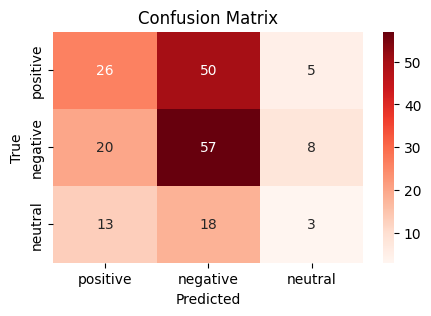

In [ ]:
#NB+BoW Model Evalution
y_pred=model.predict(X_test_bow)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test, y_pred, labels=['positive','negative','neutral'])
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['positive','negative','neutral'], yticklabels=['positive','negative','neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Testing results on random 6 reviews from dataset
def predict_sentiment(model, vectorizer, review_df):
    sample_reviews=review_df['Review'].sample(n=6).tolist()
    sample_cleaned=[text_preprocessing(review) for review in sample_reviews]
    sample_bow=vectorizer.transform(sample_cleaned)

    #sentiment prediction
    sample_predictions=model.predict(sample_bow)
    sample_confidences=np.max(model.predict_proba(sample_bow), axis=1)

    print("\nPredictions and confidences for sampled reviews:")
    for i, review in enumerate(sample_reviews):
        print(f"Review: {review}")
        print(f"Predicted Sentiment: {sample_predictions[i]}")
        print(f"Confidence: {sample_confidences[i]}\n")

predict_sentiment(model,vectorizer,review_df)



Predictions and confidences for sampled reviews:
Review: এই পণ্যটি সত্যিই ভালো!
Predicted Sentiment: negative
Confidence: 0.3924717339503777

Review: সেবাটি অসাধারণ ছিল।
Predicted Sentiment: positive
Confidence: 0.37565282364015373

Review: ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।
Predicted Sentiment: negative
Confidence: 0.5202730098512387

Review: সেবাটি অসাধারণ ছিল।
Predicted Sentiment: positive
Confidence: 0.37565282364015373

Review: মূল্য অনুযায়ী পণ্যটি ঠিক আছে।
Predicted Sentiment: negative
Confidence: 0.7344419688894462

Review: ডেলিভারি দ্রুত ছিল, পণ্যটি চমৎকার।
Predicted Sentiment: negative
Confidence: 0.5202730098512387

